# Testing the McGurk effect on Machine Learning models

### Defining the McGurk effect experiments

In [1]:
from experiments import McGurkExperiment

# Instantiate the list of experiments
experiments = [
    McGurkExperiment("ba", "ga", "da"), # ba (auditory) + ga (visual) = da  (fusioned sound)
    McGurkExperiment("ba", "fa", "va"), # ba (auditory) + fa (visual) = va  (fusioned sound)
    McGurkExperiment("ga", "ba", "bga") # ga (auditory) + ba (visual) = bga (combined sound)
]

### Ensuring reproducible experiment results

In [2]:
# Set the seeds for the experiments to ensure reproducible results
import torch
torch.manual_seed(42)
import random
random.seed(0)
import numpy as np
np.random.seed(0)

## Testing the effect on pretrained PerceiverIO models with regression mapping

### Training the models

In [3]:
from models import McGurkPerceiver

perceiver_models = []
for experiment in experiments:
    # Instantiate a Perceiver model for the given experiment
    model = McGurkPerceiver(experiment)
    perceiver_models.append(model)

for model in perceiver_models:
    print(model.name())
    # Train the models
    _, _, _, _ = model.train(epochs=100000, learning_rate=0.003, train_with_masks=True)

Perceiver model for experiment ba (auditory syllable) + ga (visual syllable) = da (expected McGurk syllable)


Training accuracy: 100.0%
Perceiver model for experiment ba (auditory syllable) + fa (visual syllable) = va (expected McGurk syllable)


Training accuracy: 100.0%
Perceiver model for experiment ga (auditory syllable) + ba (visual syllable) = bga (expected McGurk syllable)


Training accuracy: 100.0%


### Generating the predictions

In [10]:
model_predictions_avg = []

# Test the models on McGurk effect videos
for model in perceiver_models:
    print(model.name())
    predictions = model.test()
    # Average the predictions\n",
    predictions_avg = predictions.cpu().detach().numpy().mean(axis=0)
    print(predictions_avg)
    model_predictions_avg.append(predictions_avg)

# Convert the list to a numpy array
model_predictions_avg = np.array(model_predictions_avg)

Perceiver model for experiment ba (auditory syllable) + ga (visual syllable) = da (expected McGurk syllable)
[4.9681326e-05 9.7641790e-01 2.3532385e-02]
Perceiver model for experiment ba (auditory syllable) + fa (visual syllable) = va (expected McGurk syllable)
[0.00160681 0.99669266 0.00170054]
Perceiver model for experiment ga (auditory syllable) + ba (visual syllable) = bga (expected McGurk syllable)
[5.4362886e-07 9.9999946e-01 1.6435924e-11]


### Results

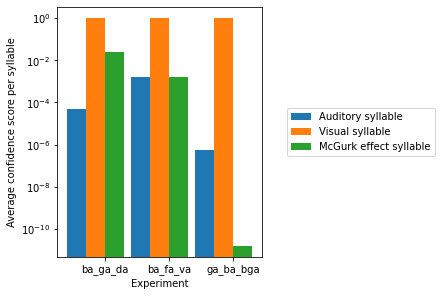

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the average confidence scores for each sound of each experiment
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)

# Define the axises labels and plot title
#ax.set_title('Average confidence scores per syllable for each experiment')
ax.set_xlabel('Experiment')
ax.set_ylabel('Average confidence score per syllable')

# Define bars for each type of syllables
ind = np.arange(len(experiments))  # the x locations for the groups
width = 0.3
plt.bar(ind - width, model_predictions_avg[:,0], width, label='Auditory syllable')
plt.bar(ind, model_predictions_avg[:,1], width, label='Visual syllable')
plt.bar(ind + width, model_predictions_avg[:,2], width, label='McGurk effect syllable')

plt.xticks(ind + width / 2, (experiments[0].to_str(), experiments[1].to_str(), experiments[2].to_str()))
plt.legend(bbox_to_anchor=(1.1, 0.5), loc='center left')
plt.yscale('log')
plt.show()

# TODO: Plot the average confidence scores for each normal sample of each experiment -> If possible, with test set
# TODO: Plot also for McGurk samples
# also maybe TODO: plot the confidence increase from normal samples to mcgurk samples for the mcgurk syllable (if it's interesting) -> maybe on a logscale
# and #TODO at home with PC, test my shiny aggregate function, and the masked pipeline, and many steps and aggresive learning rate 